![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Laboratorio | Análisis del cliente Ronda 3

Para este laboratorio, seguimos usando el archivo `marketing_customer_analysis.csv`. 

### Obtener los datos

### EDA (Análisis exploratorio de datos): complete las siguientes tareas para explorar los datos:

- Mostrar información de trama de datos.
- Describir trama de datos.
- Mostrar un gráfico del número total de respuestas.
- Mostrar un gráfico de la tasa de respuesta por canal de venta.
- Mostrar un gráfico de la tasa de respuesta por el monto total de la reclamación.
- Mostrar un gráfico de la tasa de respuesta por ingresos.

In [1]:
# Importando librerias a utilizar para el Laboratorio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ironhack-labs/lab-customer-analysis-round-3/master/files_for_lab/csv_files/marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


- Mostrar información de trama de datos.

In [3]:
# Mostrando la información del DF
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# Revisando si existen valores nulos en el DF
print(data.isnull().sum())

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64


- Describir trama de datos.

In [5]:
# Utiliazndo el metodo describe () , nos proporciona estadísticas descriptivas útiles de cada columna del DF, incluyendo la cantidad de observaciones (count), la media (mean), 
# la desviación estándar (std), los valores mínimo y máximo (min y max), y los cuartiles (25%, 50% y 75%).
# debemos tener en cuenta que el describe() solo funciona en columnas de tipo numéricas
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [6]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

- Mostrar un gráfico del número total de respuestas.

In [8]:
# Verificando el total de  valores 'yes' y 'no' que se encuentran en mi columna 'response'
resp_counts = data['Response'].value_counts()
print(resp_counts)

No     7826
Yes    1308
Name: Response, dtype: int64


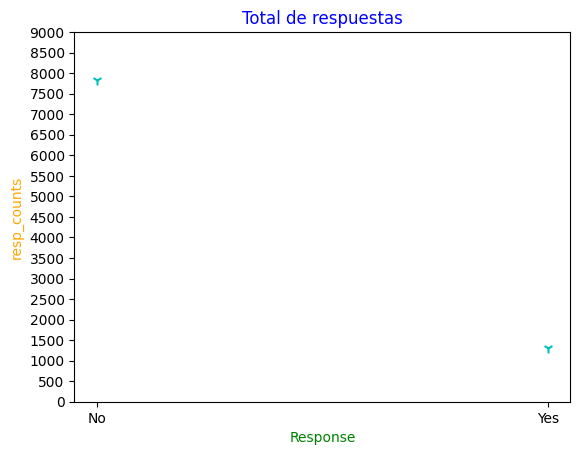

In [29]:
plt.scatter(resp_counts.index, resp_counts.values,c='c',s=50,marker='1')
plt.xlabel('Response',c='g')
plt.ylabel('resp_counts',c='orange')
plt.title('Total de respuestas',c='b')
plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000],
           [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000])

plt.show()

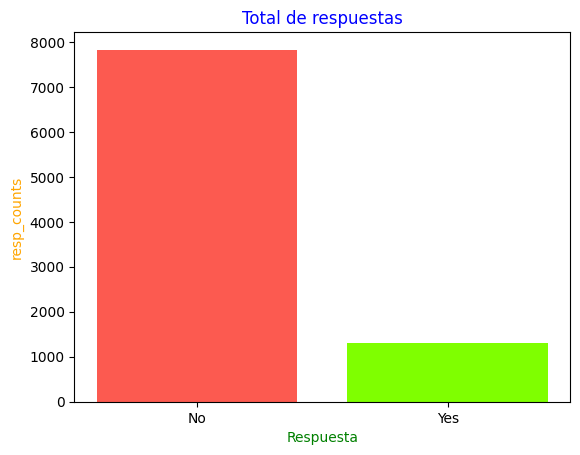

In [42]:
# visualizandolo ahora en una gráfica de barras
# se creo una lista de colores la cual coincide con la lista  de valores unicos de mi columna ´response' 
# para tener la columna de 'Yes' en verde (chartreuse) y la columna de 'No' en #FC5A50 
colors = ['#FC5A50', 'chartreuse']
plt.bar(resp_counts.index, resp_counts.values,color=colors)
plt.xlabel('Respuesta',c='g')
plt.ylabel('resp_counts',c='orange')
plt.title('Total de respuestas',c='b')
plt.show()

- Mostrar un gráfico de la tasa de respuesta por canal de venta.

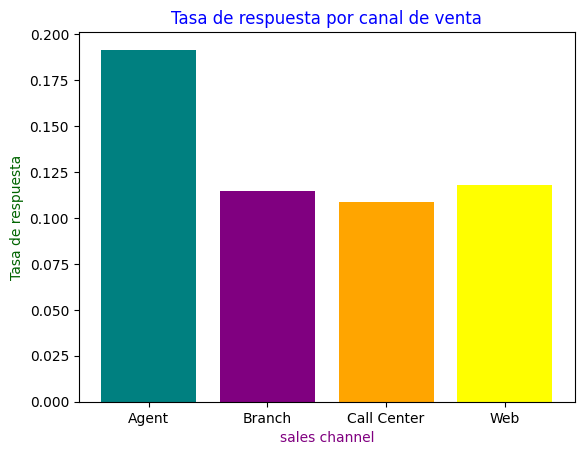

In [37]:
# Para agrupar los datos por canal de venta y luego calcular la tasa de respuesta para cada canal usamos la función groupby() 
# primero para agrupar los datos de canal de venta
# para ello creamos una variable que se llame tasa_resp
# usamos la función value_counts() para contar los valores de 'yes' y 'no' en cada canal de venta, 
# y normaliza los resultados dividiendo por el número total de valores en la columna. osea, para cada canal de venta, 
# esta expresión devuelve la proporción de respuestas 'yes' y 'no'.
# y luego usamos el método unstack() para convertir los resultados en un DF. seleccionamos la columna 'yes' esto por que es la columna que queremos utilizar para crear el gráfico 
# y calcular la tasa de respuesta

tasa_resp = data.groupby('Sales Channel')['Response'].value_counts(normalize=True).unstack()['Yes']
colors = ['teal', 'purple','orange','yellow']
plt.bar(tasa_resp.index, tasa_resp.values,color=colors)
plt.xlabel('sales channel',c='purple')
plt.ylabel('Tasa de respuesta',c='darkgreen')
plt.title('Tasa de respuesta por canal de venta', c='b')
plt.show()


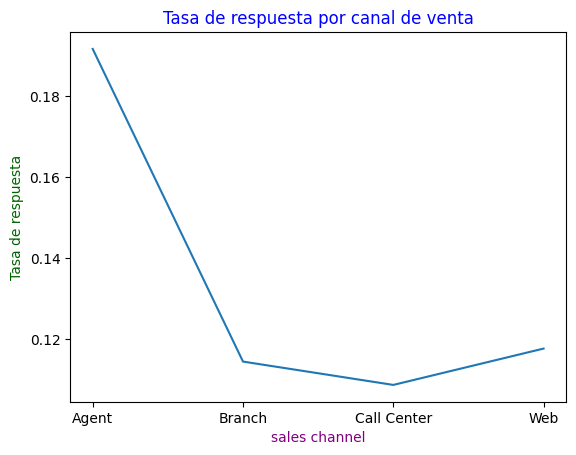

In [40]:
# en este grafico aplicamos un grafico de lineas en lugar de uno de barras
tasa_resp = data.groupby('Sales Channel')['Response'].value_counts(normalize=True).unstack()['Yes']

plt.plot(tasa_resp.index, tasa_resp.values)
plt.xlabel('sales channel',c='purple')
plt.ylabel('Tasa de respuesta',c='darkgreen')
plt.title('Tasa de respuesta por canal de venta',c='b')
plt.show()

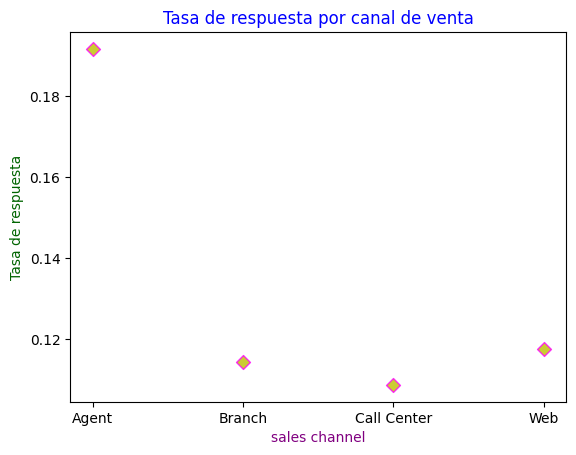

In [47]:
tasa_resp = data.groupby('Sales Channel')['Response'].value_counts(normalize=True).unstack()['Yes']

plt.scatter(tasa_resp.index, tasa_resp.values,c='y',s=50,alpha=0.8,edgecolor='magenta',marker='D')
plt.xlabel('sales channel',c='purple')
plt.ylabel('Tasa de respuesta',c='darkgreen')
plt.title('Tasa de respuesta por canal de venta',c='b')
plt.show()

- Mostrar un gráfico de la tasa de respuesta por el monto total de la reclamación.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

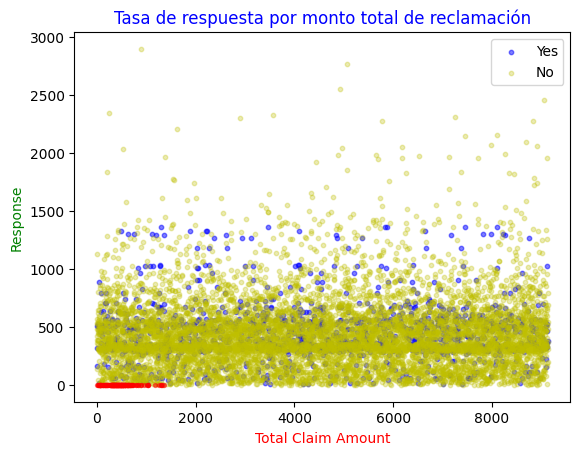

In [95]:
yes_resp = data[data['Response']=='Yes']['Total Claim Amount']
no_resp = data[data['Response']=='No']['Total Claim Amount']
plt.scatter(yes_resp.index, yes_resp.values, c='b',s=10, alpha=0.5, label='Yes')
plt.scatter(no_resp.index, no_resp.values, c='y', s=10, alpha=0.3, label='No')

tasa_resp = data.groupby('Total Claim Amount')['Response'].value_counts(normalize=True).unstack()['Yes']
plt.scatter(tasa_resp.index, tasa_resp.values,c='red',s=8,alpha=0.5)
plt.xlabel('Total Claim Amount',c='red')
plt.ylabel('Response',c='g')
plt.title('Tasa de respuesta por monto total de reclamación',c='b')
plt.legend()
plt.show()

- Mostrar un gráfico de la tasa de respuesta por ingresos.

In [48]:
data['Income'].describe()

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64

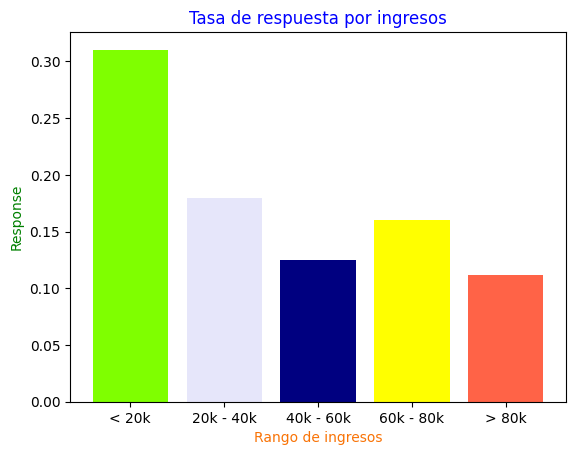

In [70]:
income_rang = ['< 20k', '20k - 40k', '40k - 60k', '60k - 80k', '> 80k']
data['income_rang'] = pd.cut(data['Income'], bins=[0, 20000, 40000, 60000, 80000, 99981], labels=income_rang)
colors = ['chartreuse', 'lavender','navy','yellow','tomato']
tasa_resp = data.groupby('income_rang')['Response'].value_counts(normalize=True).unstack()['Yes']
plt.bar(income_rang, tasa_resp,color=colors)
plt.title('Tasa de respuesta por ingresos',c='b')
plt.xlabel('Rango de ingresos',c='#F97306')
plt.ylabel('Response',c='g')
plt.show()


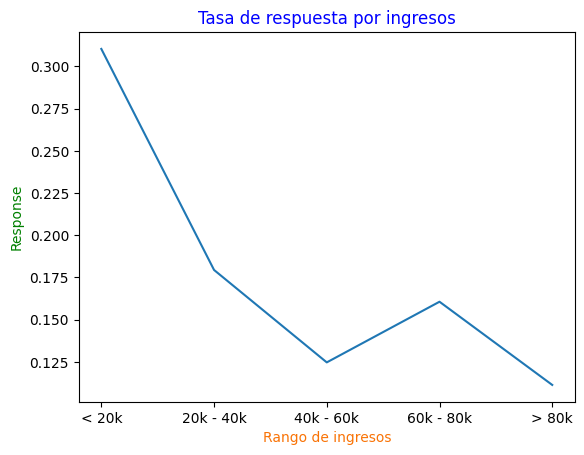

In [65]:
# Aplicando un  grafico de lineas en lugar de uno de barras
# Primero defino el rango de ingresos
income_rang = ['< 20k', '20k - 40k', '40k - 60k', '60k - 80k', '> 80k']
data['income_rang'] = pd.cut(data['Income'], bins=[0, 20000, 40000, 60000, 80000, 99981], labels=income_rang)
tasa_resp = data.groupby('income_rang')['Response'].value_counts(normalize=True).unstack()['Yes']
plt.plot(income_rang, tasa_resp)
plt.title('Tasa de respuesta por ingresos',c='b')
plt.xlabel('Rango de ingresos',c='#F97306')
plt.ylabel('Response',c='g')
plt.show()